<a href="https://colab.research.google.com/github/mayenkalu/team_heroku/blob/main/Data_Cleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')

Importing and loading the required datasets

In [2]:
#importing and loading required datasets
fdi_inflow = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/fdi_inflow_data.csv', skiprows=4)
#fdi_inflow.head()

In [3]:
gdp = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/gdp_data.csv', skiprows=4)
#gdp.head()

In [4]:
migration = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/gdp_data.csv', skiprows= 4)
#migration.head()

In [5]:
population = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/population_data.csv', skiprows = 4)
#population.head()

In [6]:
remittances_paid = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/remittances_paid_data.csv', skiprows=4)
#remittances_paid.head()

In [7]:
remittances_received = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/remittances_received_data.csv', skiprows=4)
#remittances_received.head()

In [8]:
unemployment = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/unemployment_data.csv', skiprows = 4)
#unemployment.head()

Renaming columns and dropping columns not needed like country code, indicator name and code
  - created a list library of countries in Africa to be used to filter through the dataset to extract only African countries

In [9]:
# renaming columns and dropping columns not needed like country code, indicator name and code
fdi_inflow = fdi_inflow.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

gdp = gdp.drop(columns = ['Country Code','Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

migration = migration.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

population = population.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

remittances_paid = remittances_paid.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

remittances_received = remittances_received.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

unemployment = unemployment.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})


In [10]:
#list of African countries
list_of_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
           'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d\'Ivoire',
           'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
           'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
           'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
           'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

#years with extremely large quantity of null values
years_list = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
              '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
              '1986', '1987', '1988', '1989', '1990', 'Unnamed: 67']

list_of_columns=['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
           'Cameroon', 'Central African Republic', 'Chad', 'Comoros','Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d\'Ivoire',
           'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
           'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
           'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
           'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

#find missing country
list_em=[]
for x in list_of_countries:
    if x not in list_of_columns:
        list_em.append(x)

print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [12]:
Date=[x for x in range(1991,2023)]

print(Date)

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [13]:
#checking for stationarity function with ADF testing
def adf_test(data_f):

    for col in data_f.columns:

        result = adfuller(data_f[col])
        print(f"ADF Statistic for {col}: {result[0]}")
        print(f"P-value for {col}: {result[1]}")
        print(f"Critical Values for {col}: {result[4]}")
    
    # Check the p-value to determine stationarity
        if result[1] <= 0.05:
            print(f"{col} is stationary\n")
        else:
            print(f"{col} is non-stationary\n")
        

         # Perform seasonal decomposition on a specific country
         #
        sea_dec= seasonal_decompose(data_f[col], model='multiplicative', period=30)  # Adjust 'period' as needed

        # Plot decomposition components
        sea_dec.plot()
        plt.show()

In [14]:
def iter_data(df,x):
    x['Date']=Date
    for index, row in df.iterrows():
       col_name=str(row[0])
       col_val=row[1:].to_list()

       x[col_name]=col_val
    
  



In [15]:
from datetime import datetime
date_parser=lambda x:datetime.strptime(x, "%Y-%m-%d")

In [16]:
def summarize_data(remfill):
    bfill_remrec=remfill.ffill()
    ffill_remrec=remfill.bfill()
    zfill_remrec=remfill.fillna(0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(bfill_remrec.isnull(),cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap for back fill')
    plt.show()
    sns.heatmap(ffill_remrec.isnull(),cbar=False,cmap='viridis')
    plt.title('Missing Values Heatmap for forward fill')
    plt.show()
    sns.heatmap(zfill_remrec.isnull(),cbar=False,cmap='viridis')
    plt.title('Missing Values Heatmap for zero fill')
    plt.show()

    # Descriptive Statistics
    bfill_rem_rec_stats =bfill_remrec.describe(include='all')
    ffill_rem_rec_stats =ffill_remrec.describe(include='all')

    zfill_rem_rec_stats =zfill_remrec.describe(include='all')
    
    adf_test(bfill_remrec)
    adf_test(ffill_remrec)
    adf_test(zfill_remrec)

    

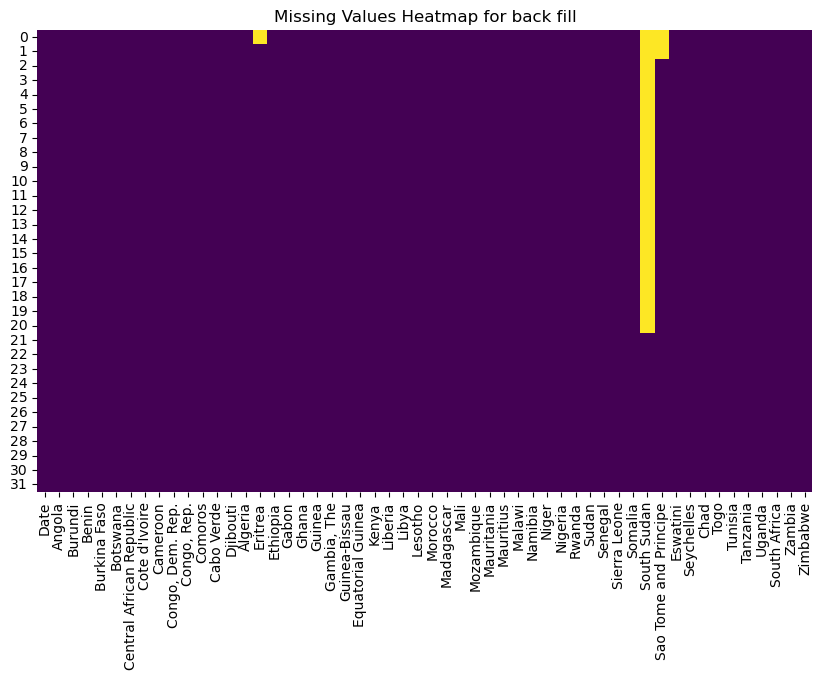

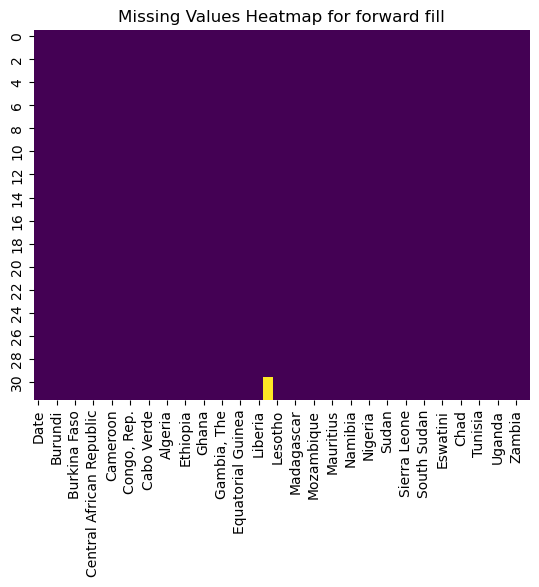

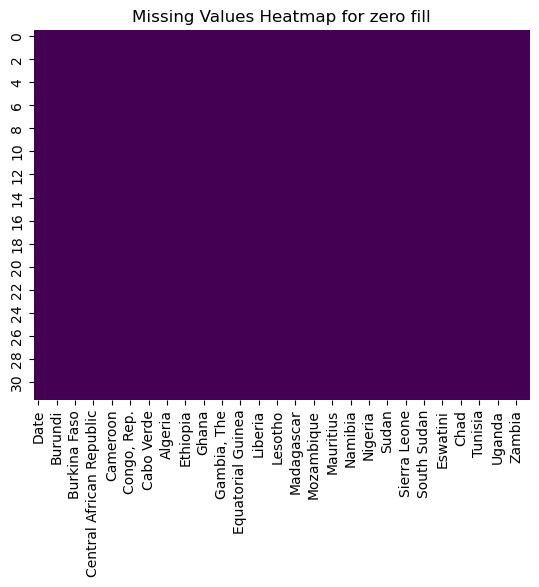

ADF Statistic for Date: -0.012544600390878029
P-value for Date: 0.9574822792195264
Critical Values for Date: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
Date is non-stationary



ValueError: x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)

In [17]:
#filtering out African countries from the dataset and dropping columns years 1960-1990
fdi_inflow_df = fdi_inflow.query('Country in @list_of_countries')
fdi_inflow_df = fdi_inflow_df.drop(columns=years_list)
fdi_inflow_df.reset_index(drop=True, inplace=True)
fdi_inflow_df

new_fdi_inflow_df={}

iter_data(fdi_inflow_df,new_fdi_inflow_df)

new_fdi_inflow_df=pd.DataFrame(new_fdi_inflow_df)
new_fdi_inflow_df['Date']=pd.to_datetime(new_fdi_inflow_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d") 

#new_fdi_inflow_df

summarize_data(new_fdi_inflow_df)




In [ ]:
unemp_df = unemployment.query('Country in @list_of_countries')
unemp_df = unemp_df.drop(columns=years_list)
unemp_df.reset_index(drop=True, inplace=True)
unemp_df

new_unemp_df={}
iter_data(unemp_df,new_unemp_df)

new_unemp_df=pd.DataFrame(new_unemp_df)

new_unemp_df['Date']=pd.to_datetime(new_unemp_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_unemp_df)

In [ ]:
#summarize_data(unemp_df)

In [ ]:
gdp_df = gdp.query('Country in @list_of_countries')
gdp_df = gdp_df.drop(columns=years_list)
gdp_df.reset_index(drop=True, inplace=True)
#gdp_df =gdp_df.transpose()
gdp_df
new_gdp_df={}

iter_data(gdp_df,new_gdp_df)

new_gdp_df=pd.DataFrame(new_gdp_df)


new_gdp_df['Date']=pd.to_datetime(new_gdp_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_gdp_df)

,Date,Angola,Burundi,Benin,Burkina Faso,Botswana,Central African Republic,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.",...,Eswatini,Seychelles,Chad,Togo,Tunisia,Tanzania,Uganda,South Africa,Zambia,Zimbabwe
0,1991,7.000000e+02,2.118980e+11,5.603878e+11,8.844180e+11,7.970750e+09,3.885670e+11,2.960043e+12,3.340200e+12,5.000000e+02,...,3.192455e+09,2.106769e+09,5.295536e+11,6.142595e+11,1.202880e+10,1.086273e+12,1.829999e+12,3.733400e+11,2.182758e+08,8.641482e+09
1,1992,3.800000e+03,2.256000e+11,5.944164e+11,8.884890e+11,8.747900e+09,3.737230e+11,2.952100e+12,3.195300e+12,1.770000e+04,...,3.664153e+09,2.363293e+09,4.981096e+11,6.089496e+11,1.370580e+10,1.369878e+12,2.745492e+12,4.191210e+11,5.695640e+08,6.751472e+09
2,1993,2.940000e+04,2.279000e+11,6.440697e+11,9.059890e+11,1.008030e+10,3.621030e+11,3.127746e+12,4.582084e+12,2.692000e+05,...,4.434945e+09,2.612688e+09,4.143380e+11,4.746444e+11,1.466300e+10,1.725536e+12,3.870387e+12,4.809945e+11,1.482122e+09,6.563813e+09
3,1994,6.781000e+05,2.337210e+11,8.872593e+11,1.052274e+12,1.143460e+10,4.725760e+11,4.615726e+12,4.942680e+12,6.950230e+07,...,5.039627e+09,2.616731e+09,6.550516e+11,7.413701e+11,1.581380e+10,2.298867e+12,4.400270e+12,5.450926e+11,2.447760e+09,6.890675e+09
4,1995,1.501530e+07,2.498650e+11,1.082966e+12,1.187733e+12,1.311420e+10,5.567450e+11,5.490706e+12,5.423134e+12,3.964218e+08,...,6.162379e+09,2.574917e+09,7.217286e+11,8.881590e+11,1.705180e+10,3.020500e+12,5.367456e+12,6.229008e+11,3.289687e+09,7.111271e+09
5,1996,8.354930e+08,2.631000e+11,1.207835e+12,1.323156e+12,1.611490e+10,5.155380e+11,9.244342e+12,5.674927e+12,2.896400e+09,...,6.890746e+09,2.660141e+09,8.222414e+11,1.018720e+12,1.906630e+10,3.767642e+12,6.122089e+12,7.018039e+11,4.345083e+09,8.553147e+09
6,1997,1.751785e+09,3.428000e+11,1.323938e+12,1.428629e+12,1.832780e+10,5.473310e+11,1.053381e+13,6.297476e+12,8.000000e+09,...,7.910553e+09,3.010613e+09,9.015880e+11,1.188909e+12,2.294340e+10,4.703459e+12,6.633475e+12,7.786445e+11,5.656664e+09,8.529572e+09
7,1998,2.555800e+09,4.002000e+11,1.448386e+12,1.654757e+12,2.024400e+10,5.706830e+11,1.157465e+13,6.665361e+12,9.989900e+09,...,8.717600e+09,3.406091e+09,1.029345e+12,1.272572e+12,2.482750e+10,8.155814e+12,7.570250e+12,8.457334e+11,6.587520e+09,6.401968e+09
8,1999,1.717100e+10,4.554000e+11,2.263338e+12,2.086188e+12,2.536140e+10,6.153774e+11,1.161885e+13,7.118458e+12,5.182385e+10,...,9.456800e+09,3.541215e+09,9.448971e+11,1.318698e+12,2.721580e+10,9.466792e+12,8.170700e+12,9.256904e+11,8.129497e+09,6.858013e+09
9,2000,9.166610e+10,6.273332e+11,2.499926e+12,2.108160e+12,2.953090e+10,6.511025e+11,1.177350e+13,7.504469e+12,1.317075e+12,...,1.206207e+10,3.738050e+09,9.861286e+11,1.439849e+12,2.943340e+10,1.070625e+13,9.364317e+12,1.053138e+12,1.120100e+10,6.689958e+09


In [ ]:
#summarize_data(gdp_df)

In [ ]:
migration_df = migration.query('Country in @list_of_countries')
migration_df = migration_df.drop(columns=years_list)
migration_df.reset_index(drop=True, inplace=True)
migration_df

new_migration_df={}

iter_data(migration_df,new_migration_df)

new_migration_df=pd.DataFrame(new_migration_df)


new_migration_df['Date']=pd.to_datetime(new_migration_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_migration_df)

In [ ]:
#summarize_data(migration_df)

In [ ]:
population_df = population.query('Country in @list_of_countries')
population_df = population_df.drop(columns=years_list)
population_df.reset_index(drop=True, inplace=True)
population_df

new_pop_df={}

iter_data(population_df,new_pop_df)

new_pop_df=pd.DataFrame(new_pop_df)

new_pop_df['Date']=pd.to_datetime(new_pop_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_pop_df)

In [ ]:
remittances_paid_df = remittances_paid.query('Country in @list_of_countries')
remittances_paid_df = remittances_paid_df.drop(columns=years_list)
remittances_paid_df.reset_index(drop=True, inplace=True)
remittances_paid_df

new_rem_paid_df={}

iter_data(remittances_paid_df,new_rem_paid_df)

new_rem_paid_df=pd.DataFrame(new_rem_paid_df)

new_rem_paid_df['Date']=pd.to_datetime(new_rem_paid_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_rem_paid_df)

In [ ]:
#summarize_data(remittances_paid_df)

In [ ]:
remittances_received_df = remittances_received.query('Country in @list_of_countries')
remittances_received_df = remittances_received_df.drop(columns=years_list)
remittances_received_df.reset_index(drop=True, inplace=True)
remittances_received_df

new_rem_rec_df={}

iter_data(remittances_received_df,new_rem_rec_df)

new_rem_rec_df=pd.DataFrame(new_rem_rec_df)

new_rem_rec_df['Date']=pd.to_datetime(new_rem_rec_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_rem_rec_df)

Remittance Received

In [ ]:
def plot_graph(data_df, c):
   

   data_df= data_df.pivot(index='Date', columns='African Country', values='Value')

# Rename the colum

   f_data=data_df.ffill()
   b_data=data_df.bfill()
   z_data=data_df.fillna(0)
    # Plotting time series line graph
   plt.figure(figsize=(12, 6))
   sns.lineplot(x='Date', y='African Country', data=f_data, label='on forward fill')
   sns.lineplot(x='Date', y='African Country', data=b_data, label='on back fill')
   sns.lineplot(x='Date', y='African Country', data=z_data, label='on zero fill')

   plt.title('time series visuals for: ', c)
   plt.xlabel('Date')
   plt.ylabel(c)
   plt.legend()
   plt.show()


   plt.figure(figsize=(12, 6))
   f_data.plot(figsize=(12, 6), linewidth=2)
   plt.title('Time Series Line Graph with NaN replaced with forward fill for ', c)
   plt.xlabel('Date')
   plt.ylabel('Values')
   plt.legend(loc='upper left')
   plt.show()

   plt.figure(figsize=(12, 6))
   b_data.plot(figsize=(12, 6), linewidth=2)
   plt.title('Time Series Line Graph with NaN replaced with back fill for ', c)
   plt.xlabel('Date')
   plt.ylabel('Values')
   plt.legend(loc='upper left')
   plt.show()

   plt.figure(figsize=(12, 6))
   z_data.plot(figsize=(12, 6), linewidth=2)
   plt.title('Time Series Line Graph with NaN replaced with zero fill for ',c)
   plt.xlabel('Date')
   plt.ylabel('Values')
   plt.legend(loc='upper left')
   plt.show()
    

In [ ]:
"""#plot graph of gdp
plot_graph(gdp_df)

#plot graph of population
plot_graph(population_df)

#plot graph of migration
plot_graph(migration_df)

#plot graph of fdi inflow
plot_graph(fdi_inflow_df)

#plot graph of remittance paid
plot_graph(remittances_paid_df)

#plot graph of remittance recieved
plot_graph(remittances_received_df)

#plot graph of unemployment
plot_graph(unemp_df) """

'#plot graph of gdp\nplot_graph(gdp_df)\n\n#plot graph of population\nplot_graph(population_df)\n\n#plot graph of migration\nplot_graph(migration_df)\n\n#plot graph of fdi inflow\nplot_graph(fdi_inflow_df)\n\n#plot graph of remittance paid\nplot_graph(remittances_paid_df)\n\n#plot graph of remittance recieved\nplot_graph(remittances_received_df)\n\n#plot graph of unemployment\nplot_graph(unemp_df) '

In [ ]:
#function for partial and autocorrelation function
def acf_pacf(data, lags=40):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax[0])
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax[1])
    plt.show()